# 폐병 환자 수술(Thoraric Surgery)
## - 은닉층(hidden layer)을 여러개 둠

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset/ThoraricSurgery.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [4]:
# 데이터셋 만듦
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

In [5]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [10]:
model = Sequential([
   Dense(24, input_dim=17, activation='relu'),
   Dense(10, activation= 'relu'),
   Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [18]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=30
)

Epoch 1/30
10/10 [==============================] - 0s 5ms/step - loss: 0.4052 - accuracy: 0.8541 - val_loss: 0.6953 - val_accuracy: 0.8028
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8541 - val_loss: 0.6906 - val_accuracy: 0.7746
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8541 - val_loss: 0.7365 - val_accuracy: 0.8028
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 0.4061 - accuracy: 0.8541 - val_loss: 0.7126 - val_accuracy: 0.8028
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8434 - val_loss: 0.8140 - val_accuracy: 0.8028
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 0.4053 - accuracy: 0.8541 - val_loss: 0.7071 - val_accuracy: 0.7887
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 0.4209 - accuracy: 0.8505 - val_loss: 0.7091 - val_accuracy: 0.8028
Epoch 8/30
10/10 [==

In [19]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 748us/step - loss: 0.4733 - accuracy: 0.8220


[0.4732683002948761, 0.8220338821411133]

# 학습과정 시각화

In [20]:
import tensorflow as tf
from tensorflow import keras
type(history.history)

dict

In [21]:
# 훈련데이터 정확도
accuracy = history.history['accuracy']
loss = history.history['loss']
accuracy[:3]

[0.854092538356781, 0.854092538356781, 0.854092538356781]

In [23]:
# 검증 데이터 정확도/손실값
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_loss[:3]

[0.6953463554382324, 0.6905950307846069, 0.736514151096344]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

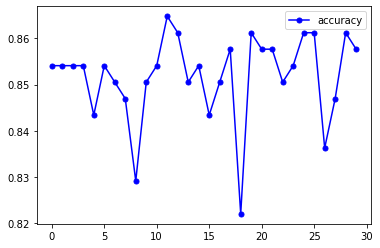

In [24]:
x_len = np.arange(len(accuracy))
# plt.figure(figsize=(12,8))
plt.plot(x_len, accuracy, 'bo-',markersize=5, label='accuracy')
plt.legend()
plt.show()

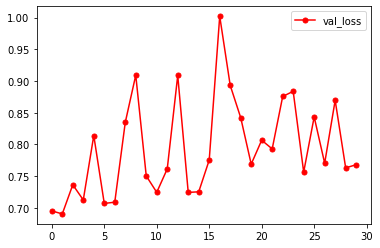

In [25]:
x_len = np.arange(len(accuracy))
# plt.figure(figsize=(12,8))
plt.plot(x_len, val_loss, 'ro-',markersize=5, label='val_loss')
plt.legend()
plt.show()